###some calculations based on the mouse standard observer and the the promised ouptut of UV projector version 2 before DLI shipped it to us.

####the main question was: do we use green only or green+blue in the green channel of the projector
####the answer was: green only. 20% brighter, plus it gives us effective opsin isolation for free

In [14]:
import djd.jeti as jeti
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [8]:
plt.close('all')

In [10]:
jeti.mso.shape

(249L,)

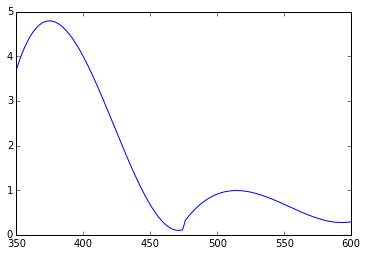

In [11]:
plt.plot(np.linspace(350,600,249),jeti.mso)

(0, 1)

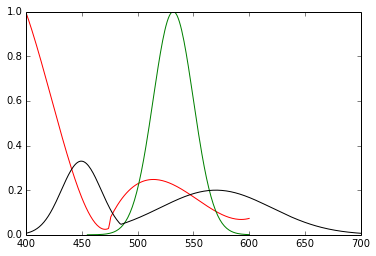

In [46]:
plt.plot(np.linspace(350,600,249),jeti.mso *0.25,color='r')

green = gaussian(np.linspace(455,600,145),532,18) 
plt.plot(np.linspace(455,600,145),green,color='g')

white = np.hstack((gaussian(np.linspace(400,485,85),450,18)*0.33,gaussian(np.linspace(485,700,215),570,50)*0.2))
plt.plot(np.linspace(400,700,300),white,color='k')

plt.xlim(400,700)
plt.ylim(0,1)

In [48]:
wv = np.linspace(350,700,350)
mso = np.zeros(350);mso[:249]=jeti.mso
green_LED = np.zeros(350);green_LED[105:105+len(green)]=green
white_LED = np.zeros(350);white_LED[50:50+len(white)]=white

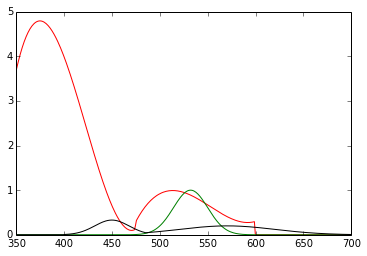

In [56]:
plt.plot(np.linspace(350,700,350),mso,color='r')
plt.plot(np.linspace(350,700,350),green_LED,color='g')
plt.plot(np.linspace(350,700,350),white_LED,color='k')

green: 3935.26512576
white: 16213.5162052
ratio: 1.1769406832


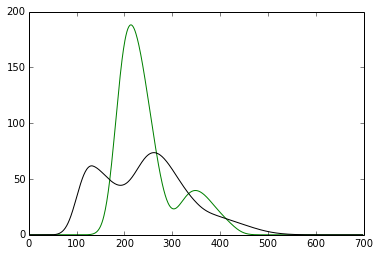

In [55]:
plt.plot(np.convolve(mso,green_LED),color='g')
plt.plot(np.convolve(mso,white_LED),color='k')
print 'green: '+str(np.trapz(np.convolve(mso[100:],green_LED[100:])))
print 'white: '+str(np.trapz(np.convolve(mso,white_LED)))
print 'ratio: '+str(np.trapz(np.convolve(mso,green_LED))/np.trapz(np.convolve(mso,white_LED)))